<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Exploratory_Project-powertheftdetection/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import glob as glob
import matplotlib.pyplot as mtp  
import pandas as pd  
from sklearn.cluster import KMeans
import sklearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as ac
from datetime import datetime, date
import random
import seaborn as sns

In [ ]:
daily_data=pd.read_csv("/content/drive/MyDrive/daily_dataset.csv.gz")
pdf=daily_data.pivot(index='day',columns='LCLid',values='energy_sum')
pdf.reset_index(inplace=True)

In [ ]:
pdf['day']=pd.to_datetime(pdf['day'])
pdf['day']= (pdf['day'].dt.strftime('%Y/%m/%d'))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


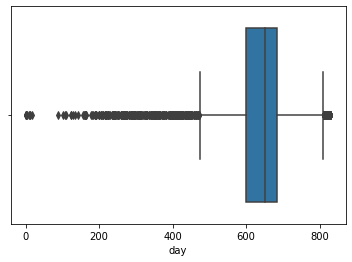

In [ ]:
#outliers
o1=daily_data.groupby('LCLid').count()
sns.boxplot(o1.day)

In [ ]:
o1.day.describe()

count    5566.000000
mean      630.692239
std       111.945099
min         1.000000
25%       600.000000
50%       651.000000
75%       684.000000
max       829.000000
Name: day, dtype: float64

In [ ]:
Q1 = np.percentile(o1['day'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(o1['day'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1
upper =  (Q3+1.5*IQR)
lower =  (Q1-1.5*IQR)
print(upper)
print(lower)

810.0
474.0


In [ ]:
o1.reset_index(inplace=True)

In [ ]:
#finding outliers
outl=[]
for i in range (0,5566):
  if o1['day'][i]<lower:
    outl.append(o1['LCLid'][i])


In [ ]:
len(outl)

332

In [ ]:
g1=pdf.groupby('day').mean()
g2=g1.transpose()
g2.reset_index(inplace=True)


In [ ]:
g2

day,LCLid,2011/11/23,2011/11/24,2011/11/25,2011/11/26,2011/11/27,2011/11/28,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/03,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,2011/12/10,2011/12/11,2011/12/12,2011/12/13,2011/12/14,2011/12/15,2011/12/16,2011/12/17,2011/12/18,2011/12/19,2011/12/20,2011/12/21,2011/12/22,2011/12/23,2011/12/24,2011/12/25,2011/12/26,2011/12/27,2011/12/28,2011/12/29,2011/12/30,2011/12/31,...,2014/01/20,2014/01/21,2014/01/22,2014/01/23,2014/01/24,2014/01/25,2014/01/26,2014/01/27,2014/01/28,2014/01/29,2014/01/30,2014/01/31,2014/02/01,2014/02/02,2014/02/03,2014/02/04,2014/02/05,2014/02/06,2014/02/07,2014/02/08,2014/02/09,2014/02/10,2014/02/11,2014/02/12,2014/02/13,2014/02/14,2014/02/15,2014/02/16,2014/02/17,2014/02/18,2014/02/19,2014/02/20,2014/02/21,2014/02/22,2014/02/23,2014/02/24,2014/02/25,2014/02/26,2014/02/27,2014/02/28
0,MAC000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.486,16.025,14.116,12.585,14.540,14.039,24.040,22.629,13.921,20.304,14.166,21.574,11.425,27.272,17.468,24.363,17.018,13.352,16.663,17.172,12.657,10.846,15.586,13.812,11.723,13.497,12.570,21.940,12.917,17.066,14.997,11.876,13.083,12.734,14.886,12.528,11.826,12.328,20.518,1.387
1,MAC000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.013,29.167,29.737,10.079,9.579,11.834,9.457,29.542,28.770,32.513,29.738,30.765,30.043,28.395,29.482,29.121,29.715,29.664,31.878,10.008,8.642,9.946,9.013,10.514,29.785,30.235,31.449,31.791,29.306,30.476,10.609,8.760,9.088,9.767,10.831,9.069,9.686,9.072,11.511,0.070
2,MAC000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.794,1.665,1.964,1.585,1.729,1.764,1.581,1.951,1.669,1.779,1.792,1.709,1.822,1.770,1.677,1.789,1.829,1.691,1.854,1.608,1.726,1.720,1.792,1.700,1.794,1.777,1.653,1.860,1.605,1.753,1.802,1.632,1.758,1.571,1.875,1.696,1.751,1.807,1.588,0.081
3,MAC000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.192,5.150,5.807,4.730,5.453,4.420,5.695,5.035,4.651,6.450,5.144,4.829,4.833,4.240,7.682,5.801,5.651,4.656,5.168,6.714,4.881,6.732,6.469,5.347,5.033,5.625,5.268,6.143,6.373,5.362,4.850,4.160,5.088,4.190,5.369,4.448,4.865,3.908,4.638,0.112
4,MAC000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.852,3.872,2.953,3.195,3.696,3.191,3.212,4.244,3.536,2.813,3.378,3.331,3.292,3.250,3.213,3.246,3.213,3.162,4.403,3.210,2.939,3.143,3.203,3.086,3.266,3.751,2.951,3.075,3.267,3.174,2.801,2.995,3.802,2.812,3.056,3.556,3.093,2.871,2.901,0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,MAC005563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5562,MAC005564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.277,4.199,4.868,4.988,4.096,3.732,4.639,4.169,4.020,4.442,4.803,8.971,4.920,4.006,3.747,4.380,3.861,4.124,4.514,3.249,5.195,5.367,3.397,4.693,2.954,4.6

In [ ]:
#removing outliers
for i in range (0,5566):
  if (g2['LCLid'][i] in outl):
    g2.drop(i,inplace=True)

In [ ]:
g2

day,LCLid,2011/11/23,2011/11/24,2011/11/25,2011/11/26,2011/11/27,2011/11/28,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/03,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,2011/12/10,2011/12/11,2011/12/12,2011/12/13,2011/12/14,2011/12/15,2011/12/16,2011/12/17,2011/12/18,2011/12/19,2011/12/20,2011/12/21,2011/12/22,2011/12/23,2011/12/24,2011/12/25,2011/12/26,2011/12/27,2011/12/28,2011/12/29,2011/12/30,2011/12/31,...,2014/01/20,2014/01/21,2014/01/22,2014/01/23,2014/01/24,2014/01/25,2014/01/26,2014/01/27,2014/01/28,2014/01/29,2014/01/30,2014/01/31,2014/02/01,2014/02/02,2014/02/03,2014/02/04,2014/02/05,2014/02/06,2014/02/07,2014/02/08,2014/02/09,2014/02/10,2014/02/11,2014/02/12,2014/02/13,2014/02/14,2014/02/15,2014/02/16,2014/02/17,2014/02/18,2014/02/19,2014/02/20,2014/02/21,2014/02/22,2014/02/23,2014/02/24,2014/02/25,2014/02/26,2014/02/27,2014/02/28
0,MAC000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.486,16.025,14.116,12.585,14.540,14.039,24.040,22.629,13.921,20.304,14.166,21.574,11.425,27.272,17.468,24.363,17.018,13.352,16.663,17.172,12.657,10.846,15.586,13.812,11.723,13.497,12.570,21.940,12.917,17.066,14.997,11.876,13.083,12.734,14.886,12.528,11.826,12.328,20.518,1.387
1,MAC000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.013,29.167,29.737,10.079,9.579,11.834,9.457,29.542,28.770,32.513,29.738,30.765,30.043,28.395,29.482,29.121,29.715,29.664,31.878,10.008,8.642,9.946,9.013,10.514,29.785,30.235,31.449,31.791,29.306,30.476,10.609,8.760,9.088,9.767,10.831,9.069,9.686,9.072,11.511,0.070
2,MAC000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.794,1.665,1.964,1.585,1.729,1.764,1.581,1.951,1.669,1.779,1.792,1.709,1.822,1.770,1.677,1.789,1.829,1.691,1.854,1.608,1.726,1.720,1.792,1.700,1.794,1.777,1.653,1.860,1.605,1.753,1.802,1.632,1.758,1.571,1.875,1.696,1.751,1.807,1.588,0.081
3,MAC000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.192,5.150,5.807,4.730,5.453,4.420,5.695,5.035,4.651,6.450,5.144,4.829,4.833,4.240,7.682,5.801,5.651,4.656,5.168,6.714,4.881,6.732,6.469,5.347,5.033,5.625,5.268,6.143,6.373,5.362,4.850,4.160,5.088,4.190,5.369,4.448,4.865,3.908,4.638,0.112
4,MAC000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.852,3.872,2.953,3.195,3.696,3.191,3.212,4.244,3.536,2.813,3.378,3.331,3.292,3.250,3.213,3.246,3.213,3.162,4.403,3.210,2.939,3.143,3.203,3.086,3.266,3.751,2.951,3.075,3.267,3.174,2.801,2.995,3.802,2.812,3.056,3.556,3.093,2.871,2.901,0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,MAC005557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.083,5.214,7.218,7.968,7.623,7.320,5.203,6.427,7.088,6.809,5.616,7.996,6.699,5.881,6.986,7.016,6.281,5.976,7.507,6.161,5.944,7.147,6.167,7.368,7.334,6.927,7.987,5.526,5.898,6.643,8.094,7.341,7.914,6.765,6.607,6.394,6.034,6.688,6.382,0.110
5559,MAC005561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.608,8.058,5.060,7.917,3.641,4.957,4.436,6.545,6.133,6.016,7.420,6.059,5

In [ ]:
#interpolation
clean = g2.interpolate(method='linear', limit_direction='both')

In [ ]:
clean= clean.dropna(axis=0, how='any')


In [ ]:
clean

day,LCLid,2011/11/23,2011/11/24,2011/11/25,2011/11/26,2011/11/27,2011/11/28,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/03,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,2011/12/10,2011/12/11,2011/12/12,2011/12/13,2011/12/14,2011/12/15,2011/12/16,2011/12/17,2011/12/18,2011/12/19,2011/12/20,2011/12/21,2011/12/22,2011/12/23,2011/12/24,2011/12/25,2011/12/26,2011/12/27,2011/12/28,2011/12/29,2011/12/30,2011/12/31,...,2014/01/20,2014/01/21,2014/01/22,2014/01/23,2014/01/24,2014/01/25,2014/01/26,2014/01/27,2014/01/28,2014/01/29,2014/01/30,2014/01/31,2014/02/01,2014/02/02,2014/02/03,2014/02/04,2014/02/05,2014/02/06,2014/02/07,2014/02/08,2014/02/09,2014/02/10,2014/02/11,2014/02/12,2014/02/13,2014/02/14,2014/02/15,2014/02/16,2014/02/17,2014/02/18,2014/02/19,2014/02/20,2014/02/21,2014/02/22,2014/02/23,2014/02/24,2014/02/25,2014/02/26,2014/02/27,2014/02/28
0,MAC000002,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,...,12.486,16.025,14.116,12.585,14.540,14.039,24.040,22.629,13.921,20.304,14.166,21.574,11.425,27.272,17.468,24.363,17.018,13.352,16.663,17.172,12.657,10.846,15.586,13.812,11.723,13.497,12.570,21.940,12.917,17.066,14.997,11.876,13.083,12.734,14.886,12.528,11.826,12.328,20.518,1.387
1,MAC000003,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,...,9.013,29.167,29.737,10.079,9.579,11.834,9.457,29.542,28.770,32.513,29.738,30.765,30.043,28.395,29.482,29.121,29.715,29.664,31.878,10.008,8.642,9.946,9.013,10.514,29.785,30.235,31.449,31.791,29.306,30.476,10.609,8.760,9.088,9.767,10.831,9.069,9.686,9.072,11.511,0.070
2,MAC000004,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,...,1.794,1.665,1.964,1.585,1.729,1.764,1.581,1.951,1.669,1.779,1.792,1.709,1.822,1.770,1.677,1.789,1.829,1.691,1.854,1.608,1.726,1.720,1.792,1.700,1.794,1.777,1.653,1.860,1.605,1.753,1.802,1.632,1.758,1.571,1.875,1.696,1.751,1.807,1.588,0.081
3,MAC000005,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,...,6.192,5.150,5.807,4.730,5.453,4.420,5.695,5.035,4.651,6.450,5.144,4.829,4.833,4.240,7.682,5.801,5.651,4.656,5.168,6.714,4.881,6.732,6.469,5.347,5.033,5.625,5.268,6.143,6.373,5.362,4.850,4.160,5.088,4.190,5.369,4.448,4.865,3.908,4.638,0.112
4,MAC000006,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,...,3.852,3.872,2.953,3.195,3.696,3.191,3.212,4.244,3.536,2.813,3.378,3.331,3.292,3.250,3.213,3.246,3.213,3.162,4.403,3.210,2.939,3.143,3.203,3.086,3.266,3.751,2.951,3.075,3.267,3.174,2.801,2.995,3.802,2.812,3.056,3.556,3.093,2.871,2.901,0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,MAC005557,7.408,6.047,5.71,7.340,5.896,4.949,8.739,2.748,2.501,13.846,7.503,22.645,6.863,27.883,34.984,43.668,43.897,48.201,46.328,46.647,37.07

In [ ]:

temp=clean.set_index('LCLid')

In [ ]:
temp

day,2011/11/23,2011/11/24,2011/11/25,2011/11/26,2011/11/27,2011/11/28,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/03,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,2011/12/10,2011/12/11,2011/12/12,2011/12/13,2011/12/14,2011/12/15,2011/12/16,2011/12/17,2011/12/18,2011/12/19,2011/12/20,2011/12/21,2011/12/22,2011/12/23,2011/12/24,2011/12/25,2011/12/26,2011/12/27,2011/12/28,2011/12/29,2011/12/30,2011/12/31,2012/01/01,...,2014/01/20,2014/01/21,2014/01/22,2014/01/23,2014/01/24,2014/01/25,2014/01/26,2014/01/27,2014/01/28,2014/01/29,2014/01/30,2014/01/31,2014/02/01,2014/02/02,2014/02/03,2014/02/04,2014/02/05,2014/02/06,2014/02/07,2014/02/08,2014/02/09,2014/02/10,2014/02/11,2014/02/12,2014/02/13,2014/02/14,2014/02/15,2014/02/16,2014/02/17,2014/02/18,2014/02/19,2014/02/20,2014/02/21,2014/02/22,2014/02/23,2014/02/24,2014/02/25,2014/02/26,2014/02/27,2014/02/28
LCLid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MAC000002,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,6.327,...,12.486,16.025,14.116,12.585,14.540,14.039,24.040,22.629,13.921,20.304,14.166,21.574,11.425,27.272,17.468,24.363,17.018,13.352,16.663,17.172,12.657,10.846,15.586,13.812,11.723,13.497,12.570,21.940,12.917,17.066,14.997,11.876,13.083,12.734,14.886,12.528,11.826,12.328,20.518,1.387
MAC000003,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,6.327,...,9.013,29.167,29.737,10.079,9.579,11.834,9.457,29.542,28.770,32.513,29.738,30.765,30.043,28.395,29.482,29.121,29.715,29.664,31.878,10.008,8.642,9.946,9.013,10.514,29.785,30.235,31.449,31.791,29.306,30.476,10.609,8.760,9.088,9.767,10.831,9.069,9.686,9.072,11.511,0.070
MAC000004,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,6.327,...,1.794,1.665,1.964,1.585,1.729,1.764,1.581,1.951,1.669,1.779,1.792,1.709,1.822,1.770,1.677,1.789,1.829,1.691,1.854,1.608,1.726,1.720,1.792,1.700,1.794,1.777,1.653,1.860,1.605,1.753,1.802,1.632,1.758,1.571,1.875,1.696,1.751,1.807,1.588,0.081
MAC000005,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,6.327,...,6.192,5.150,5.807,4.730,5.453,4.420,5.695,5.035,4.651,6.450,5.144,4.829,4.833,4.240,7.682,5.801,5.651,4.656,5.168,6.714,4.881,6.732,6.469,5.347,5.033,5.625,5.268,6.143,6.373,5.362,4.850,4.160,5.088,4.190,5.369,4.448,4.865,3.908,4.638,0.112
MAC000006,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504,7.180,6.661,6.588,6.327,...,3.852,3.872,2.953,3.195,3.696,3.191,3.212,4.244,3.536,2.813,3.378,3.331,3.292,3.250,3.213,3.246,3.213,3.162,4.403,3.210,2.939,3.143,3.203,3.086,3.266,3.751,2.951,3.075,3.267,3.174,2.801,2.995,3.802,2.812,3.056,3.556,3.093,2.871,2.901,0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC005557,7.408,6.047,5.71,7.340,5.8

In [ ]:
temp.describe()

day,2011/11/23,2011/11/24,2011/11/25,2011/11/26,2011/11/27,2011/11/28,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/03,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,2011/12/10,2011/12/11,2011/12/12,2011/12/13,2011/12/14,2011/12/15,2011/12/16,2011/12/17,2011/12/18,2011/12/19,2011/12/20,2011/12/21,2011/12/22,2011/12/23,2011/12/24,2011/12/25,2011/12/26,2011/12/27,2011/12/28,2011/12/29,2011/12/30,2011/12/31,2012/01/01,...,2014/01/20,2014/01/21,2014/01/22,2014/01/23,2014/01/24,2014/01/25,2014/01/26,2014/01/27,2014/01/28,2014/01/29,2014/01/30,2014/01/31,2014/02/01,2014/02/02,2014/02/03,2014/02/04,2014/02/05,2014/02/06,2014/02/07,2014/02/08,2014/02/09,2014/02/10,2014/02/11,2014/02/12,2014/02/13,2014/02/14,2014/02/15,2014/02/16,2014/02/17,2014/02/18,2014/02/19,2014/02/20,2014/02/21,2014/02/22,2014/02/23,2014/02/24,2014/02/25,2014/02/26,2014/02/27,2014/02/28
count,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,...,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000
mean,7.447625,6.217763,5.942635,7.569810,6.125737,5.121557,8.827425,3.130668,2.908079,13.722987,7.721027,22.271623,7.099435,26.984267,33.713994,42.111027,42.280057,46.394895,44.672444,44.887721,35.843148,48.401996,50.945542,27.419445,26.295313,31.607211,26.981038,23.711536,24.807330,18.289357,24.276275,27.359777,20.131962,20.693767,21.590233,19.975551,25.333137,25.210836,25.472787,24.240659,...,11.461081,11.400380,11.127797,11.313060,11.418597,11.624290,12.738105,11.768161,11.364586,11.815018,11.692977,11.872487,11.720846,12.096380,11.297915,11.116884,11.413897,11.454225,10.983268,11.571600,12.215273,11.285236,11.467792,11.676458,11.308460,11.826562,11.485898,11.580798,11.016231,10.801185,10.700090,10.600961,10.540530,10.787317,11.499251,10.428681,10.315796,10.229250,10.371385,0.210280
std,0.349004,1.064632,1.396507,1.406442,1.389215,1.112924,0.824338,2.050936,2.122994,1.190751,1.442816,2.107753,1.583710,4.179886,5.728127,6.967603,7.243970,8.078662,7.431512,7.844994,5.645952,8.446187,9.023728,14.185031,12.084774,13.327103,12.582927,11.880688,11.454665,9.155492,10.641159,9.083734,7.059544,7.275877,7.624489,9.001656,11.322595,12.738442,12.381823,10.347071,...,10.320260,10.362069,9.767482,10.270282,10.551998,10.186841,11.100087,10.795069,10.312128,10.925430,10.863032,10.890079,10.610860,10.699067,10.182104,10.006523,10.058383,10.015467,9.475130,9.787498,10.455521,9.846267,10.369536,10.581273,10.236451,10.745529,9.926651,9.874531,9.666312,9.356590,9.166291,9.000916,8.926095,9.154801,9.497194,8.620398,8.698225,8.641637,8.738947,0.377881
min,1.283000,1.138000,0.582000,0.537000,1.119000,0.131000,0.000000,0.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cluster = KMeans(n_clusters=3)
arr = pd.DataFrame(cluster.fit_predict(temp))

In [ ]:
clst =clean.merge(arr, left_index=True, right_index=True)
clst = clst.set_index('LCLid')
clst

,2011/11/23,2011/11/24,2011/11/25,2011/11/26,2011/11/27,2011/11/28,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/03,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,2011/12/10,2011/12/11,2011/12/12,2011/12/13,2011/12/14,2011/12/15,2011/12/16,2011/12/17,2011/12/18,2011/12/19,2011/12/20,2011/12/21,2011/12/22,2011/12/23,2011/12/24,2011/12/25,2011/12/26,2011/12/27,2011/12/28,2011/12/29,2011/12/30,2011/12/31,2012/01/01,...,2014/01/21,2014/01/22,2014/01/23,2014/01/24,2014/01/25,2014/01/26,2014/01/27,2014/01/28,2014/01/29,2014/01/30,2014/01/31,2014/02/01,2014/02/02,2014/02/03,2014/02/04,2014/02/05,2014/02/06,2014/02/07,2014/02/08,2014/02/09,2014/02/10,2014/02/11,2014/02/12,2014/02/13,2014/02/14,2014/02/15,2014/02/16,2014/02/17,2014/02/18,2014/02/19,2014/02/20,2014/02/21,2014/02/22,2014/02/23,2014/02/24,2014/02/25,2014/02/26,2014/02/27,2014/02/28,0
LCLid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MAC000002,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504000,7.180000,6.661000,6.588000,6.327000,...,16.025,14.116,12.585,14.540,14.039,24.040,22.629,13.921,20.304,14.166,21.574000,11.425,27.272000,17.468000,24.363000,17.018,13.352,16.663,17.172,12.657,10.846,15.586000,13.812,11.723,13.497000,12.5700,21.9400,12.917000,17.0660,14.997000,11.8760,13.0830,12.734000,14.886000,12.528,11.8260,12.3280,20.5180,1.3870,2
MAC000003,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504000,7.180000,6.661000,6.588000,6.327000,...,29.167,29.737,10.079,9.579,11.834,9.457,29.542,28.770,32.513,29.738,30.765000,30.043,28.395000,29.482000,29.121000,29.715,29.664,31.878,10.008,8.642,9.946,9.013000,10.514,29.785,30.235000,31.4490,31.7910,29.306000,30.4760,10.609000,8.7600,9.0880,9.767000,10.831000,9.069,9.6860,9.0720,11.5110,0.0700,1
MAC000004,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504000,7.180000,6.661000,6.588000,6.327000,...,1.665,1.964,1.585,1.729,1.764,1.581,1.951,1.669,1.779,1.792,1.709000,1.822,1.770000,1.677000,1.789000,1.829,1.691,1.854,1.608,1.726,1.720,1.792000,1.700,1.794,1.777000,1.6530,1.8600,1.605000,1.7530,1.802000,1.6320,1.7580,1.571000,1.875000,1.696,1.7510,1.8070,1.5880,0.0810,2
MAC000005,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504000,7.180000,6.661000,6.588000,6.327000,...,5.150,5.807,4.730,5.453,4.420,5.695,5.035,4.651,6.450,5.144,4.829000,4.833,4.240000,7.682000,5.801000,5.651,4.656,5.168,6.714,4.881,6.732,6.469000,5.347,5.033,5.625000,5.2680,6.1430,6.373000,5.3620,4.850000,4.1600,5.0880,4.190000,5.369000,4.448,4.8650,3.9080,4.6380,0.1120,2
MAC000006,8.952,12.135,13.72,15.234,13.189,9.882,11.859,14.031,13.572,11.720,13.170,16.575,12.427,14.819,16.264,24.624,25.142,27.389,16.616,19.438,20.379,24.196,21.890,27.210,22.468,21.894,16.537,8.134,11.039,6.712,6.538,9.461,6.394,6.392,6.384,6.504000,7.180000,6.661000,6.588000,6.327000,...,3.872,2.953,3.195,3.696,3.191,3.212,4.244,3.536,2.813,3.378,3.331000,3.292,3.250000,3.213000,3.246000,3.213,3.162,4.403,3.210,2.939,3.143,3.203000,3.086,3.266,3.751000,2.9510,3.0750,3.267000,3.1740,2.801000,2.9950,3.8020,2.812000,3.056000,3.556,3.0930,2.8710,2.9010,0.0280,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
cl1= clst[clst[0]==0]
cl1= cl1.drop([0], axis=1)

cl2= clst[clst[0]==1]
cl2= cl2.drop([0], axis=1)

cl3= clst[clst[0]==2]
cl3= cl3.drop([0], axis=1)


In [ ]:
print(cl1.shape)
print(cl2.shape)
print(cl3.shape)

(2491, 829)
(714, 829)
(1713, 829)


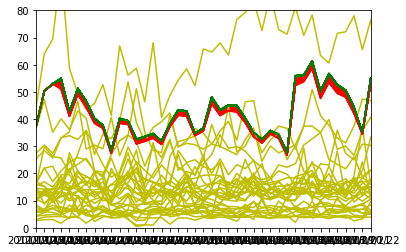

In [ ]:
#showing clusters
for i in range(58,90):
    mtp.plot(cl3.iloc[i],'y')
    mtp.plot(cl2.iloc[i],'r')
    mtp.plot(cl1.iloc[i],'g')
    mtp.axis([20, 60, 0, 80])

In [ ]:
#10% of each cluster
th1=cl1.sample(n=171)
th2=cl2.sample(n=250)
th3=cl3.sample(n=74)
f=[th1,th2,th3]
theft=pd.concat(f)

In [ ]:
theft = theft.sample(frac = 1)


In [ ]:
l=theft.columns

In [ ]:
l=l[1:]
l

Index(['2011/11/24', '2011/11/25', '2011/11/26', '2011/11/27', '2011/11/28',
       '2011/11/29', '2011/11/30', '2011/12/01', '2011/12/02', '2011/12/03',
       ...
       '2014/02/19', '2014/02/20', '2014/02/21', '2014/02/22', '2014/02/23',
       '2014/02/24', '2014/02/25', '2014/02/26', '2014/02/27', '2014/02/28'],
      dtype='object', length=828)

In [ ]:
#
for i in range(0,165):
    fact=random.uniform(0.1,0.9)
    for k in l:
        theft[k][i]= theft[k][i]*fact

In [ ]:
for i in range(165,330):
    for k in l:
        fact=random.uniform(0.1,0.9)
        theft[k][i]= theft[k][i]*fact

In [ ]:

for i in range(330,495):
    me=np.mean(theft.iloc[i])
    for k in l:
        fact=random.uniform(0.1,0.9)
        theft[k][i]= me*fact


In [ ]:
theft['label']=1

In [ ]:
clean['label']=0

In [ ]:
clean.set_index('LCLid' , inplace=True)

In [ ]:
final=pd.concat([clean,theft])

In [ ]:
final.reset_index(inplace=True)

In [ ]:
final=final.sample(frac=1)

In [ ]:
final

day,LCLid,2011/11/23,2011/11/24,2011/11/25,2011/11/26,2011/11/27,2011/11/28,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/03,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,2011/12/10,2011/12/11,2011/12/12,2011/12/13,2011/12/14,2011/12/15,2011/12/16,2011/12/17,2011/12/18,2011/12/19,2011/12/20,2011/12/21,2011/12/22,2011/12/23,2011/12/24,2011/12/25,2011/12/26,2011/12/27,2011/12/28,2011/12/29,2011/12/30,2011/12/31,...,2014/01/21,2014/01/22,2014/01/23,2014/01/24,2014/01/25,2014/01/26,2014/01/27,2014/01/28,2014/01/29,2014/01/30,2014/01/31,2014/02/01,2014/02/02,2014/02/03,2014/02/04,2014/02/05,2014/02/06,2014/02/07,2014/02/08,2014/02/09,2014/02/10,2014/02/11,2014/02/12,2014/02/13,2014/02/14,2014/02/15,2014/02/16,2014/02/17,2014/02/18,2014/02/19,2014/02/20,2014/02/21,2014/02/22,2014/02/23,2014/02/24,2014/02/25,2014/02/26,2014/02/27,2014/02/28,label
1995,MAC002126,7.408,6.047,5.71,7.34,5.896,4.949,8.739,2.748,2.501,13.846,7.503,22.645,6.863,27.883,34.984,43.668,43.897,48.201,46.328,46.647,37.077,50.286,52.967,34.174768,33.606401,39.660476,34.427833,30.833943,31.713254,23.598841,30.568279,32.745124,23.308498,24.329389,25.644903,25.266030,32.135182,32.831979,32.894479,...,5.198,4.279,4.395,4.442,4.644,6.577,4.765,4.715,6.033,5.588,6.165,5.433,5.038,5.750,4.948,4.758,5.038,4.950,5.333,5.127,5.553,6.042,6.419,5.889,7.371,5.703,5.121,5.757,7.576,5.131,5.613,6.259,5.135,4.252,5.707,3.551,3.858,2.906,0.070,0
1128,MAC001190,7.408,6.047,5.71,7.34,5.896,4.949,8.739,2.748,2.501,13.846,7.503,22.645,6.863,27.883,34.984,43.668,43.897,48.201,46.328,46.647,37.077,50.286,52.967,44.981849,38.331651,45.702707,40.797263,35.715602,34.839233,26.018211,35.597941,36.194541,28.140822,29.142246,30.335862,28.716995,35.382837,38.317817,38.119266,...,7.690,7.713,9.951,9.454,12.109,11.090,7.103,7.648,9.087,8.027,7.822,11.416,12.208,7.389,7.178,7.617,9.008,7.266,11.044,10.496,9.065,7.717,8.551,7.686,7.088,13.790,10.187,11.831,9.745,9.607,9.986,9.783,14.099,11.170,8.558,7.413,8.060,7.652,0.305,0
1382,MAC001471,7.408,6.047,5.71,7.34,5.896,4.949,8.739,2.748,2.501,13.846,7.503,22.645,6.863,27.883,34.984,43.668,43.897,48.201,46.328,46.647,37.077,50.286,52.967,41.815761,36.947322,43.932549,38.931248,34.285450,33.923433,25.309422,34.124429,35.183985,26.725124,27.732251,28.961579,27.705986,34.431390,36.710662,36.588590,...,12.681,14.565,11.103,13.256,12.257,13.692,14.494,14.785,10.029,9.765,13.239,10.600,11.728,10.507,13.107,7.448,11.433,7.895,8.802,21.401,13.008,13.297,15.138,11.458,12.616,12.778,11.633,13.362,18.130,14.872,14.166,13.882,15.963,11.524,14.763,13.206,16.415,13.577,0.197,0
2879,MAC003061,7.408,6.047,5.71,7.34,5.896,4.949,8.739,2.748,2.501,13.846,7.503,22.645,6.863,27.883,34.984,43.668,43.897,48.201,46.328,46.647,37.077,50.286,52.967,23.155784,28.788500,33.499770,27.933512,25.856565,28.525982,21.132032,25.439996,29.228072,18.381421,19.422163,20.861965,21.747399,28.823847,27.238575,27.567246,...,27.894,22.407,18.927,31.479,34.116,36.342,23.622,30.979,24.765,29.349,22.601,35.489,31.050,28.736,23.665,26.608,23.462,21.309,31.005,41.653,22.518,25.862,22.092,27.340,21.140,34.806,35.586,24.458,27.005,28.022,22.705,26.455,29.150,32.702,25.051,24.330,30.417,23.234,0.315,0
3173,MAC003381,7.408,6.047,5.71,7.34,5.896,4.949,8.739,2.748,2.501,13.846,7.503,22.645,6.863,27.883,34.984,43.668,43.897,48.201,46.328,46.647,37.077,50.286,52.967,19.491099,27.186166,31.450847,25.773636,24.201193,27.465961,20.311622,23.734436,28.058373,16.742778,17.790122,19.271259,20.577175,27.722566,25.378326,25.795519,...,8.048,10.559,9.664,10.734,11.773,11.419,8.200,8.730,10.095,9.888,10.268,11.725,13.286,9.414,9.681,9.199,9.856,11.161,12.365,11.529,9.508,8.693,10.563,7.507,4.411,3.750,4.446,10.853,8.499,11.932,10.332,11.862,12.517,9.386,8.737,7.858,9.835,9.376,0.102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
sf=final.set_index('LCLid')
label=sf['label']

In [ ]:

pl=final.drop('label',1)

In [ ]:
org= pl.melt(id_vars=['LCLid'], var_name='date', value_name='energy')
org.set_index('date', inplace=True)
org.reset_index(inplace=True)

In [ ]:
org

,date,LCLid,energy
0,2011/11/23,MAC002126,7.408
1,2011/11/23,MAC001190,7.408
2,2011/11/23,MAC001471,7.408
3,2011/11/23,MAC003061,7.408
4,2011/11/23,MAC003381,7.408
...,...,...,...
4749336,2014/02/28,MAC003804,0.035
4749337,2014/02/28,MAC004859,1.096
4749338,2014/02/28,MAC002197,0.034
4749339,2014/02/28,MAC000200,0.061


In [ ]:
label=pd.DataFrame(label)
label

,label
LCLid,
MAC002126,0
MAC001190,0
MAC001471,0
MAC003061,0
MAC003381,0
...,...
MAC003804,0
MAC004859,0
MAC002197,0


In [ ]:
org.set_index('LCLid',inplace=True)
org=org.merge(label,left_index=True, right_index=True)

In [ ]:
org

,date,energy,label
LCLid,,,
MAC000002,2011/11/23,8.952,0
MAC000002,2011/11/24,12.135,0
MAC000002,2011/11/25,13.720,0
MAC000002,2011/11/26,15.234,0
MAC000002,2011/11/27,13.189,0
...,...,...,...
MAC005566,2014/02/24,4.829,0
MAC005566,2014/02/25,4.857,0
MAC005566,2014/02/26,4.898,0


In [ ]:
#more features
fea=pd.read_csv('/content/drive/MyDrive/feature_selection.csv')

In [ ]:
fea

,date,perciptype,day_name,month,hol+sun,season
0,2011/11/23,0,6,11,0,2
1,2011/11/24,0,4,11,0,2
2,2011/11/25,0,0,11,0,2
3,2011/11/26,0,2,11,0,2
4,2011/11/27,0,3,11,1,2
...,...,...,...,...,...,...
824,2014/02/24,0,1,2,0,0
825,2014/02/25,0,5,2,0,0
826,2014/02/26,0,6,2,0,0
827,2014/02/27,0,4,2,0,0


In [ ]:
fea.set_index('date',inplace=True)
org.set_index('date',inplace=True)
org=org.merge(fea,left_index=True , right_index=True)

In [ ]:
org.reset_index(inplace=True)

In [ ]:
org

,date,energy,label,perciptype,day_name,month,hol+sun,season
0,2011/11/23,8.952,0,0,6,11,0,2
1,2011/11/23,8.952,0,0,6,11,0,2
2,2011/11/23,8.952,0,0,6,11,0,2
3,2011/11/23,8.952,0,0,6,11,0,2
4,2011/11/23,8.952,0,0,6,11,0,2
...,...,...,...,...,...,...,...,...
5570046,2014/02/28,0.110,0,0,0,2,0,0
5570047,2014/02/28,0.092,0,0,0,2,0,0
5570048,2014/02/28,0.129,0,0,0,2,0,0
5570049,2014/02/28,0.061,0,0,0,2,0,0


In [ ]:
#weather features
wea_fea=pd.read_csv('/content/drive/MyDrive/weather_feature_selection.csv')
wea_fea

,date,temp_avg,uvIndex
0,2011/11/23,7.085,1.0
1,2011/11/24,10.745,1.0
2,2011/11/25,10.245,1.0
3,2011/11/26,9.985,1.0
4,2011/11/27,9.005,1.0
...,...,...,...
822,2014/02/24,11.110,1.0
823,2014/02/25,9.110,1.0
824,2014/02/26,7.730,2.0
825,2014/02/27,7.120,2.0


In [ ]:
wea_fea.set_index('date',inplace=True)
org.set_index('date',inplace=True)
org=org.merge(wea_fea,left_index=True , right_index=True)

In [ ]:
org

,energy,label,perciptype,day_name,month,hol+sun,season,temp_avg,uvIndex
date,,,,,,,,,
2011/11/23,8.952,0,0,6,11,0,2,7.085,1.0
2011/11/23,8.952,0,0,6,11,0,2,7.085,1.0
2011/11/23,8.952,0,0,6,11,0,2,7.085,1.0
2011/11/23,8.952,0,0,6,11,0,2,7.085,1.0
2011/11/23,8.952,0,0,6,11,0,2,7.085,1.0
...,...,...,...,...,...,...,...,...,...
2014/02/28,0.110,0,0,0,2,0,0,5.390,1.0
2014/02/28,0.092,0,0,0,2,0,0,5.390,1.0
2014/02/28,0.129,0,0,0,2,0,0,5.390,1.0


In [ ]:
org.reset_index(inplace=True)

In [ ]:
final_data=org.drop('date',1)

In [ ]:
final_data

,energy,label,perciptype,day_name,month,hol+sun,season,temp_avg,uvIndex
0,8.952,0,0,6,11,0,2,7.085,1.0
1,8.952,0,0,6,11,0,2,7.085,1.0
2,8.952,0,0,6,11,0,2,7.085,1.0
3,8.952,0,0,6,11,0,2,7.085,1.0
4,8.952,0,0,6,11,0,2,7.085,1.0
...,...,...,...,...,...,...,...,...,...
5570046,0.110,0,0,0,2,0,0,5.390,1.0
5570047,0.092,0,0,0,2,0,0,5.390,1.0
5570048,0.129,0,0,0,2,0,0,5.390,1.0
5570049,0.061,0,0,0,2,0,0,5.390,1.0


In [ ]:
final_data.to_csv( "/content/drive/MyDrive/explo_final_data(km).csv", index=False, encoding='utf-8-sig')